# Task 1

Create a function to rename DataFrame columns using dict_names.  
Summarize cleaned data and annotate observations (e.g., outliers, variability). 

**Inputs**: df, dict_names  
**Outputs**: renamed_df, summary notes 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a function to rename the DataFrame columns
def rename_col (df, dict_names):
    return df.rename(columns=dict_names)

In [4]:
# Import the dataframe
df = pd.read_csv('breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Create the dictionary dict_names to later use it in the rename_col function
dict_names = dict(zip(df.columns, df.columns.str.replace(" ", "_")))

renamed_df = rename_col(df, dict_names)
renamed_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# See if any of the columns has any NAN values
renamed_df.isna().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [7]:
# Use the pandas function describe to get a quick calculation of the descriptive statistics of each column of the dataframe
renamed_df.describe(include='all')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Task 2

- Create scatterplots for two variables 
grouped by category.

In [8]:
plt.style.use('ggplot')

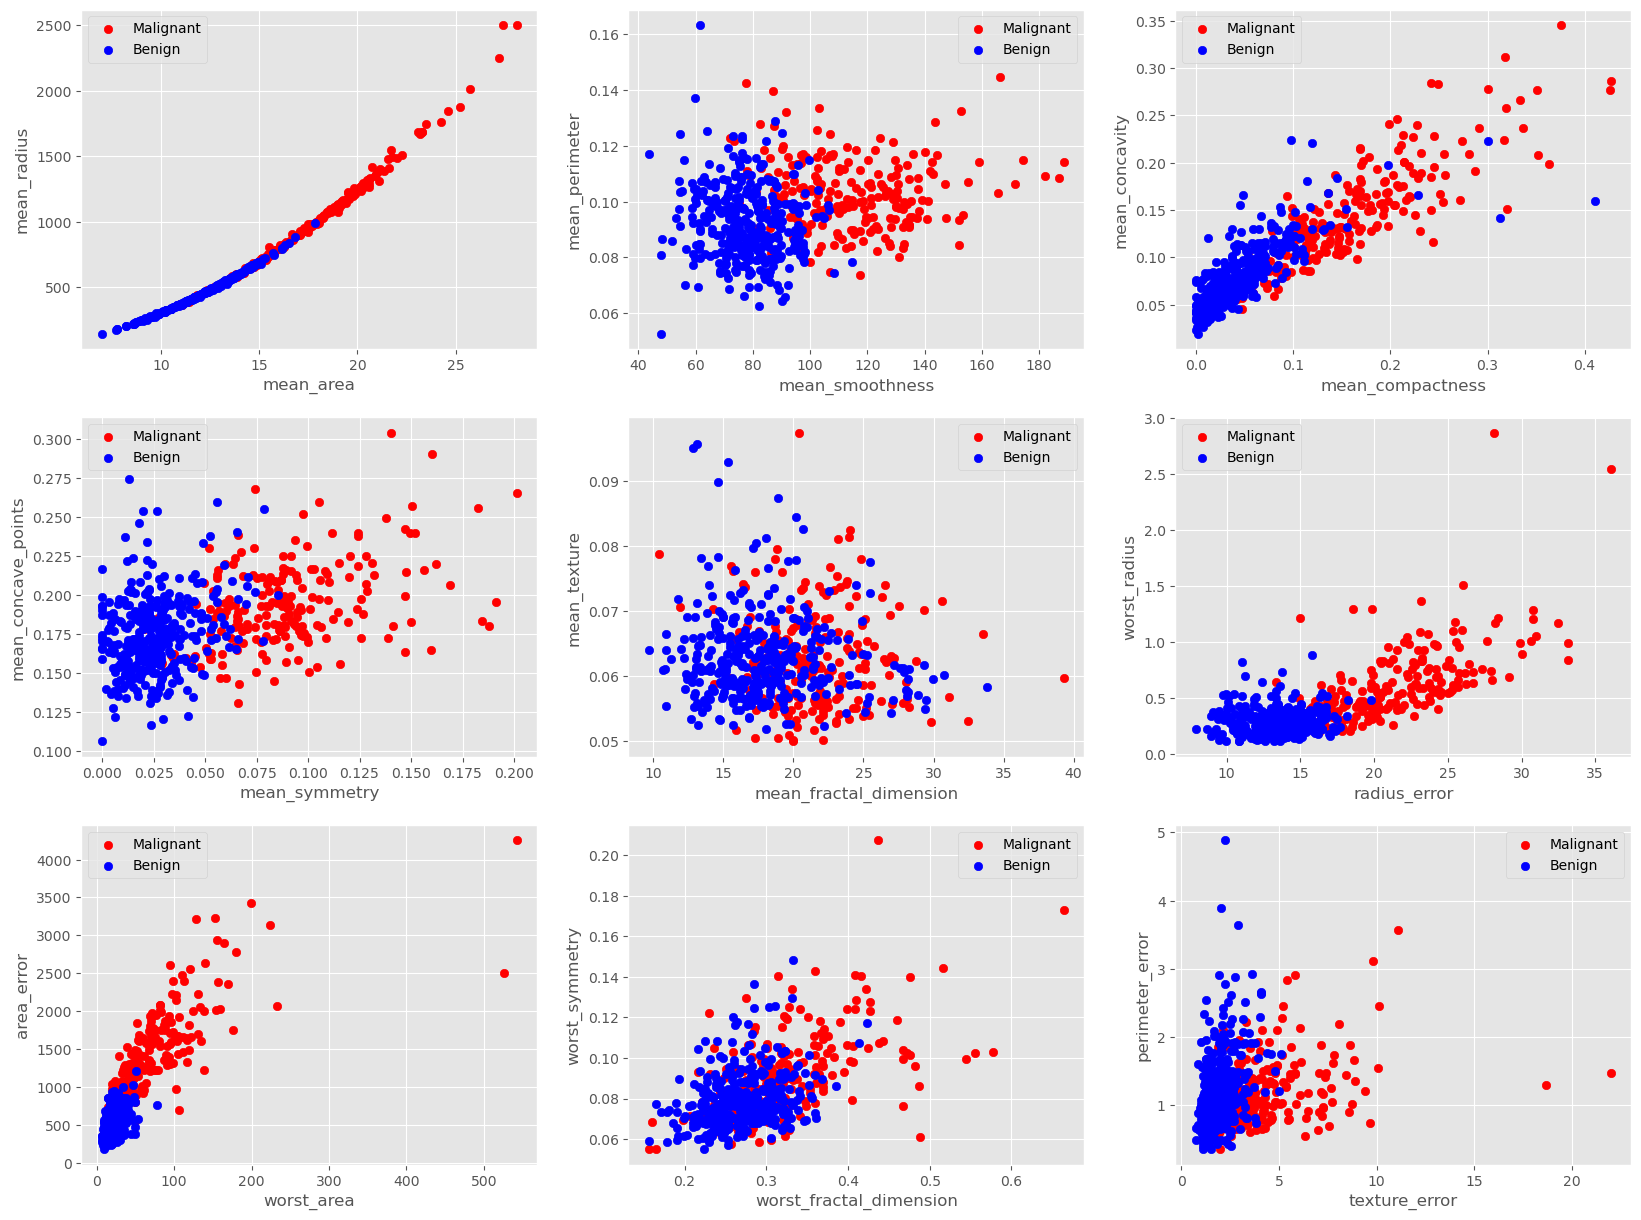

In [9]:
fig, axs = plt.subplots(3, 3,figsize=(20,15))
axs[0,0].scatter(renamed_df.mean_radius[renamed_df.diagnosis == 0], renamed_df.mean_area[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,0].scatter(renamed_df.mean_radius[renamed_df.diagnosis == 1], renamed_df.mean_area[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,0].set_ylabel('mean_radius')
axs[0,0].set_xlabel('mean_area')
axs[0,0].legend()

axs[0,1].scatter(renamed_df.mean_perimeter[renamed_df.diagnosis == 0], renamed_df.mean_smoothness[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,1].scatter(renamed_df.mean_perimeter[renamed_df.diagnosis == 1], renamed_df.mean_smoothness[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,1].set_ylabel('mean_perimeter')
axs[0,1].set_xlabel('mean_smoothness')
axs[0,1].legend()

axs[0,2].scatter(renamed_df.mean_concavity[renamed_df.diagnosis == 0], renamed_df.mean_compactness[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,2].scatter(renamed_df.mean_concavity[renamed_df.diagnosis == 1], renamed_df.mean_compactness[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,2].set_ylabel('mean_concavity')
axs[0,2].set_xlabel('mean_compactness')
axs[0,2].legend()


axs[1,0].scatter(renamed_df.mean_concave_points[renamed_df.diagnosis == 0], renamed_df.mean_symmetry[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,0].scatter(renamed_df.mean_concave_points[renamed_df.diagnosis == 1], renamed_df.mean_symmetry[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,0].set_ylabel('mean_concave_points')
axs[1,0].set_xlabel('mean_symmetry')
axs[1,0].legend()

axs[1,1].scatter(renamed_df.mean_texture[renamed_df.diagnosis == 0], renamed_df.mean_fractal_dimension[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,1].scatter(renamed_df.mean_texture[renamed_df.diagnosis == 1], renamed_df.mean_fractal_dimension[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,1].set_ylabel('mean_texture')
axs[1,1].set_xlabel('mean_fractal_dimension')
axs[1,1].legend()

axs[1,2].scatter(renamed_df.worst_radius[renamed_df.diagnosis == 0], renamed_df.radius_error[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,2].scatter(renamed_df.worst_radius[renamed_df.diagnosis == 1], renamed_df.radius_error[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,2].set_ylabel('worst_radius')
axs[1,2].set_xlabel('radius_error')
axs[1,2].legend()

axs[2,0].scatter(renamed_df.area_error[renamed_df.diagnosis == 0], renamed_df.worst_area[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,0].scatter(renamed_df.area_error[renamed_df.diagnosis == 1], renamed_df.worst_area[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,0].set_ylabel('area_error')
axs[2,0].set_xlabel('worst_area')
axs[2,0].legend()

axs[2,1].scatter(renamed_df.worst_symmetry[renamed_df.diagnosis == 0], renamed_df.worst_fractal_dimension[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,1].scatter(renamed_df.worst_symmetry[renamed_df.diagnosis == 1], renamed_df.worst_fractal_dimension[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,1].set_ylabel('worst_symmetry')
axs[2,1].set_xlabel('worst_fractal_dimension')
axs[2,1].legend()

axs[2,2].scatter(renamed_df.perimeter_error[renamed_df.diagnosis == 0], renamed_df.texture_error[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,2].scatter(renamed_df.perimeter_error[renamed_df.diagnosis == 1], renamed_df.texture_error[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,2].set_ylabel('perimeter_error')
axs[2,2].set_xlabel('texture_error')
axs[2,2].legend()

plt.show()

The features that seem more useful to predict diagnosis are: 
- *mean_radius*, 
- *mean_area*, 
- *mean_compactness*,
- *mean_smoothness*, 
- and *mean_symmetry*.

## Task 3

Normalize all variables in df using z-score or min-max scaling.  
I will use the renamed_df as input.

For the normalization we will use the z-score rather than the min-max normalization, the z-score handles the outliers better and also searching information it seems that it works better with ML algorithms and is used as the standard. 

In [10]:
target = 'diagnosis'
def zscore(dataframe,target):
    num_cols = dataframe.select_dtypes('number').columns.drop(target)
    dataframe[num_cols] = (dataframe[num_cols] - dataframe[num_cols].mean())/dataframe[num_cols].std()
    return dataframe

df_norm = zscore(renamed_df,target)
df_norm.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,0


Now we see correlation amog all variables:

In [11]:
X = df_norm.drop('diagnosis',axis=1)
corr = X.corr().abs()
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean_texture,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean_smoothness,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean_compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean_concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean_concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean_symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean_fractal_dimension,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


There are variables that have a lot of correlation between them (like mean_radius and mean_perimeter), this can lead to redundancy, giving collinearity problems. I will drop one of the 2 varaibles that are highly correlated between them.

In [12]:
thr = 0.9
shape = corr.shape
# keep only upper triangle (from the diagonal of corr = 1) of the corr matrix to avoid duplicates
upper = corr.where(np.triu(np.ones(shape), k=1).astype(bool))

# columns to drop that has a correlation > thr with a previous column
to_drop = [col for col in upper.columns if (upper[col] > thr).any()]

X_reduced = X.drop(columns=to_drop)
cleaned_df = pd.concat([X_reduced, df_norm['diagnosis']], axis=1)


In [13]:
#The dropped columns were:
X.columns.difference(X_reduced.columns)

Index(['area_error', 'mean_area', 'mean_concave_points', 'mean_perimeter',
       'perimeter_error', 'worst_area', 'worst_concave_points',
       'worst_perimeter', 'worst_radius', 'worst_texture'],
      dtype='object')

In [14]:
cleaned_df.head()

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,smoothness_error,...,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_smoothness,worst_compactness,worst_concavity,worst_symmetry,worst_fractal_dimension,diagnosis
0,1.096100,-2.071512,1.567087,3.280628,2.650542,2.215566,2.253764,2.487545,-0.564768,-0.213814,...,0.723390,0.660239,1.147747,0.906286,1.306537,2.614365,2.107672,2.748204,1.935312,0
1,1.828212,-0.353322,-0.826235,-0.486643,-0.023825,0.001391,-0.867889,0.498816,-0.875473,-0.604819,...,-0.440393,0.259933,-0.804742,-0.099356,-0.375282,-0.430066,-0.146620,-0.243675,0.280943,0
2,1.578499,0.455786,0.941382,1.052000,1.362280,0.938859,-0.397658,1.227596,-0.779398,-0.296744,...,0.212889,1.423575,0.236827,0.293301,0.526944,1.081980,0.854222,1.151242,0.201214,0
3,-0.768233,0.253509,3.280667,3.399917,1.914213,2.864862,4.906602,0.326087,-0.110312,0.689095,...,0.818798,1.114027,4.728520,2.045711,3.391291,3.889975,1.987839,6.040726,4.930672,0
4,1.748758,-1.150804,0.280125,0.538866,1.369806,-0.009552,-0.561956,1.269426,-0.789549,1.481763,...,0.827742,1.143199,-0.360775,0.498889,0.220362,-0.313119,0.612640,-0.867590,-0.396751,0


## Task 4: 
In this part of the notebook we've done aggregation and classification. In which we've develop a function to aggregate variables by grouping variable using pandas groupby. In adition we've implemented classification (KNN) to distinguish patients vs. controls.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns

###  Function to Aggregate Variables using GroupBy

In [16]:
def aggregate_by_grouping_variable(df, grouping_variable):
    """
    Aggregate all numeric variables by a grouping variable using groupby.
    """
    numeric_cols = df.select_dtypes('number').columns.drop(grouping_variable)
    
    aggregated = df.groupby(grouping_variable)[numeric_cols].agg(['mean', 'std', 'min', 'max'])
    
    return aggregated


### KNN Classification Model


In [17]:

X = cleaned_df.drop('diagnosis', axis=1)
y = cleaned_df['diagnosis']

# We've Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())

Training set size: 455
Testing set size: 114

Class distribution in training set:
diagnosis
1    285
0    170
Name: count, dtype: int64


Before selecting an especific K value we approximate it via a lot of possible ones

Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\julia\anaconda3\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Users\julia\anaconda3\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\julia\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\julia\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\julia\anaconda3\Lib\site-packages\joblib\externals

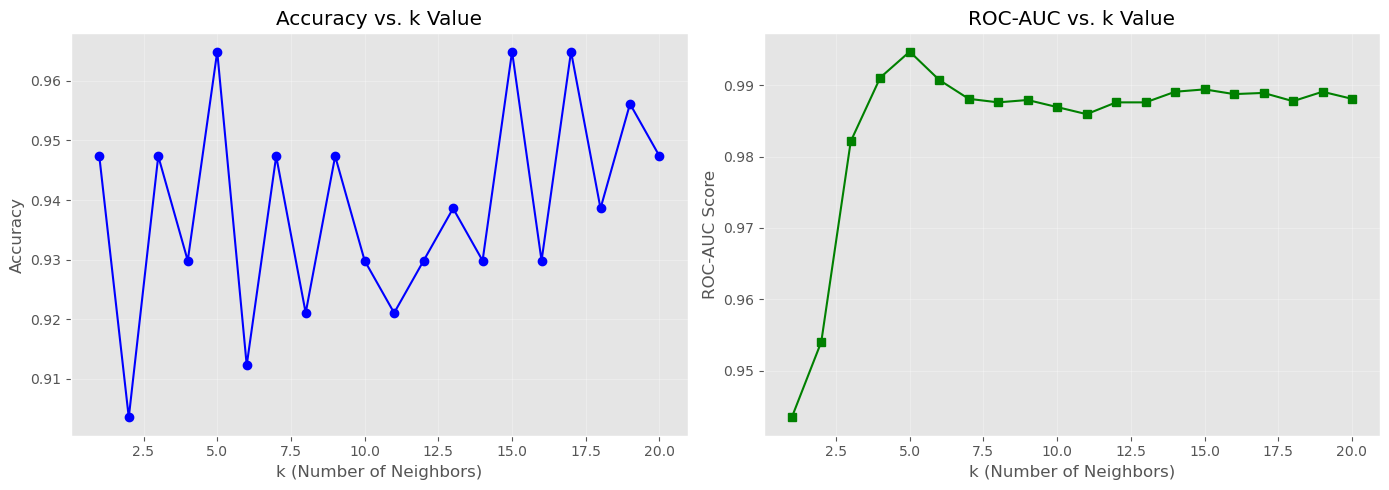


Best k value: 5
Best accuracy: 0.9649


In [18]:
# Test different values of k to find the best one
k_values = range(1, 21)
accuracies = []
roc_aucs = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    y_pred_proba_temp = knn_temp.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred_temp)
    auc = roc_auc_score(y_test, y_pred_proba_temp)
    
    accuracies.append(acc)
    roc_aucs.append(auc)

# We plot the results
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
ax[0].set_xlabel('k (Number of Neighbors)')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy vs. k Value')
ax[0].grid(True, alpha=0.3)

ax[1].plot(k_values, roc_aucs, marker='s', linestyle='-', color='green')
ax[1].set_xlabel('k (Number of Neighbors)')
ax[1].set_ylabel('ROC-AUC Score')
ax[1].set_title('ROC-AUC vs. k Value')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# And we've find the best k value
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

K = 5 is the best choice: it yields excellent accuracy while keeping the model simple, reducing the risk of overfitting and overly optimistic performance estimates.

KNN Classifier Results (k=5):
Accuracy: 0.9649
ROC-AUC Score: 0.9947


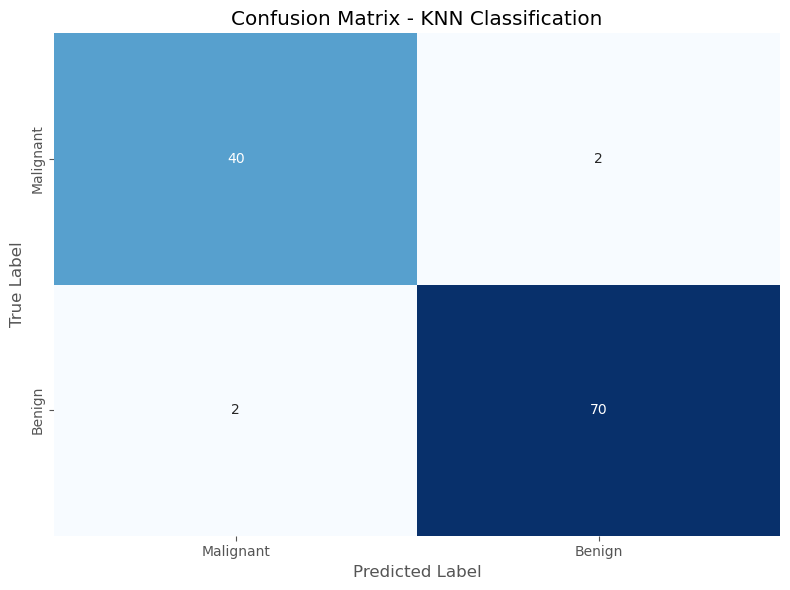


Confusion Matrix:
[[40  2]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.95      0.95      0.95        42
   Benign (1)       0.97      0.97      0.97        72

     accuracy                           0.96       114
    macro avg       0.96      0.96      0.96       114
 weighted avg       0.96      0.96      0.96       114



In [19]:
# We train the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# We calculate accuracy as the performance metric
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"KNN Classifier Results (k=5):")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# We also do a confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion Matrix - KNN Classification')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)

# We do a classification report as summary 
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Malignant (0)', 'Benign (1)']))

## Task 5: 

In this section of the notebook, we implement a Decision Tree model and compare its performance with the model developed in the previous section using the same train–test split validation approach.

### Decision Tree Classification Model

In [20]:
from sklearn import tree

X = cleaned_df.drop('diagnosis', axis=1)
y = cleaned_df['diagnosis']

# Just like before, data has been splitted into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())

Training set size: 455
Testing set size: 114

Class distribution in training set:
diagnosis
1    285
0    170
Name: count, dtype: int64


As in the previous section, the maximum depth parameter is selected by testing different values and choosing the one that achieves the highest accuracy.

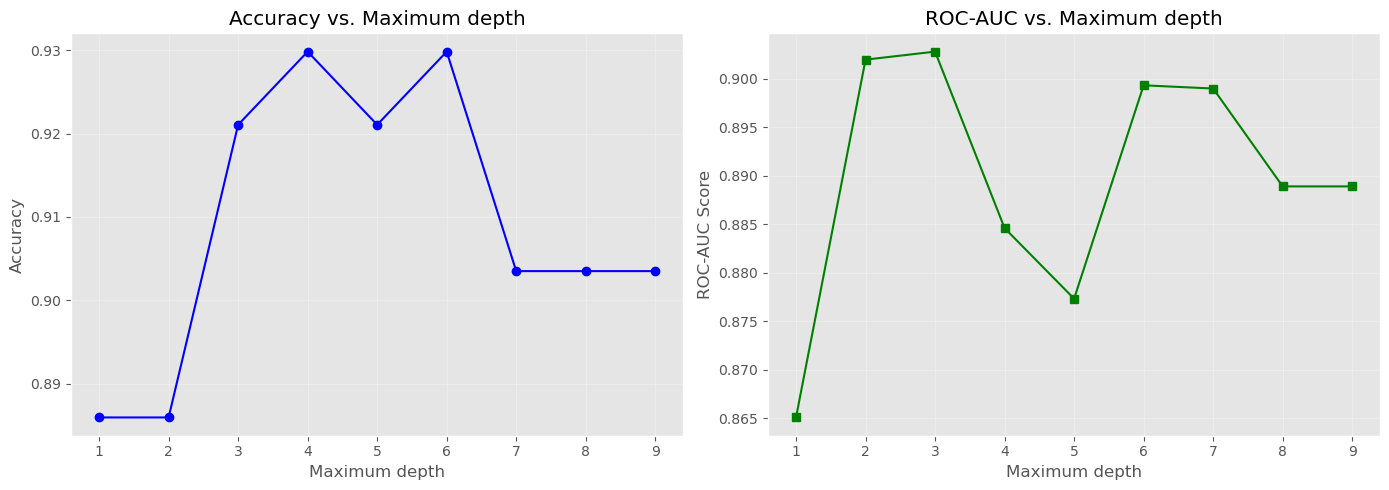


Best maximum depth value: 4
Best accuracy: 0.9298


In [21]:
max_depth_values = list(range(1, 10))
accuracies = []
roc_aucs = []

for depth in max_depth_values:
    dt_temp = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt_temp.fit(X_train, y_train)   

    y_pred_temp = dt_temp.predict(X_test)
    y_pred_proba_temp = dt_temp.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred_temp)
    auc = roc_auc_score(y_test, y_pred_proba_temp)
    
    accuracies.append(acc)
    roc_aucs.append(auc)

# We plot the results
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(max_depth_values, accuracies, marker='o', linestyle='-', color='blue')
ax[0].set_xlabel('Maximum depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy vs. Maximum depth')
ax[0].grid(True, alpha=0.3)

ax[1].plot(max_depth_values, roc_aucs, marker='s', linestyle='-', color='green')
ax[1].set_xlabel('Maximum depth')
ax[1].set_ylabel('ROC-AUC Score')
ax[1].set_title('ROC-AUC vs. Maximum depth')
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# And we've find the best k value
best_max_depth = max_depth_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest maximum depth value: {best_max_depth}")
print(f"Best accuracy: {best_accuracy:.4f}")

According to the results, the Decision Tree model with a maximum depth of 4 achieves the highest accuracy and is selected for further evaluation using the train–test split validation strategy.

Decision Trees Classifier Results (k=5):
Accuracy: 0.9298
ROC-AUC Score: 0.8846


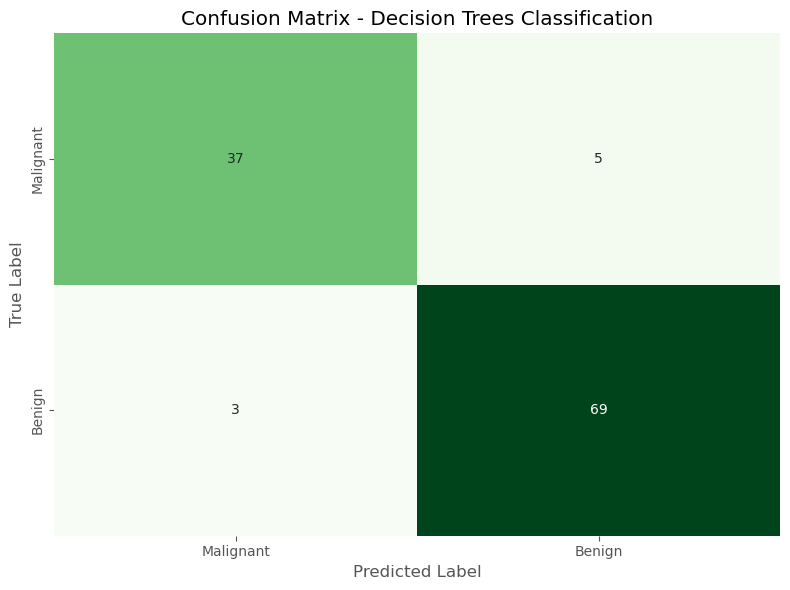


Confusion Matrix:
[[37  5]
 [ 3 69]]

Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.93      0.88      0.90        42
   Benign (1)       0.93      0.96      0.95        72

     accuracy                           0.93       114
    macro avg       0.93      0.92      0.92       114
 weighted avg       0.93      0.93      0.93       114



In [22]:
# The decision tree classifier is trained with a max_depth = 4.
dt = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
dt.fit(X_train, y_train)   

y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# We calculate accuracy and the ROC-AUC as the performance metric
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Decision Trees Classifier Results (k=5):")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# We also do a confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=ax,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion Matrix - Decision Trees Classification')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)

# We do a classification report as summary 
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Malignant (0)', 'Benign (1)']))

### Selection of the best model for API implementation based on validation results. 

By comparing the results from both models, we can see that the KNN model achieves higher accuracy than the Decision Tree model. Both models were evaluated using the same validation strategy, the evaluation metrics used were **accuracy** and the **area under the ROC curve (ROC-AUC)**. 

The results show that both models perform well, with high accuracy and ROC-AUC values, indicating that they can effectively distinguish between malignant and benign breast cells. However, since the **KNN model** performs better overall, it was selected as the final model for API implementation. 

In [23]:
# Selected model for the API implementation: 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Task 6: 

In this part of the notebook, we only save the trained model and the feature names, as they are required for the API. The API script is located in the "api" folder and is named "main.py".

In [ ]:
# Save the trained KNN model for later use in the API
import joblib

joblib.dump(knn, "knn_model.pkl")

In [ ]:
# Save the feature names for later use in the API
feature_names = X_train.columns.tolist()

joblib.dump(feature_names, "feature_names.pkl")